In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [3]:
annotations_shapefile = "data/shapefile/grid/swiss_tree_annotations_with_filtered_grid.shp"
anno_df = gpd.read_file(annotations_shapefile)

split_csv = "data/grid_split_result.csv"
grid_split = pd.read_csv(split_csv)

anno_centroids = anno_df.copy()
anno_centroids["geometry"] = anno_centroids.geometry.centroid
anno_df['grid_id'] = anno_df['grid_id'].astype(int)

In [4]:
anno_with_split = anno_df.merge(grid_split, on="grid_id", how="left")

split_counts = anno_with_split["split"].value_counts()

print("🌳 Total samples per split:")
print(split_counts)

🌳 Total samples per split:
split
train         17089
validation     3660
test           3659
Name: count, dtype: int64


In [6]:
species_split_counts = (
    anno_with_split.groupby(["split", "TreeAI_ID"])
    .size()
    .unstack(fill_value=0)
)

REMOVE_SPECIES = [49, 62, 64]
species_split_counts = species_split_counts.drop(columns=REMOVE_SPECIES, errors='ignore')

print("Number of samples per species in each split (after removal):")
print(species_split_counts)

Number of samples per species in each split (after removal):
TreeAI_ID     3    6    9     12    13    24   26  30  36   43   56   63
split                                                                   
test         415  123  124   235  2111   265   72   5   7  139  119   44
train       1940  574  579  1094  9854  1237  334  27  42  646  555  206
validation   416  123  124   234  2112   265   71   5   7  138  119   44


In [7]:
species_split_counts.to_csv("data/split_species_counts_filtered.csv")

In [12]:
species_split_counts = species_split_counts[
    species_split_counts.loc["train"].sort_values(ascending=False).index
]

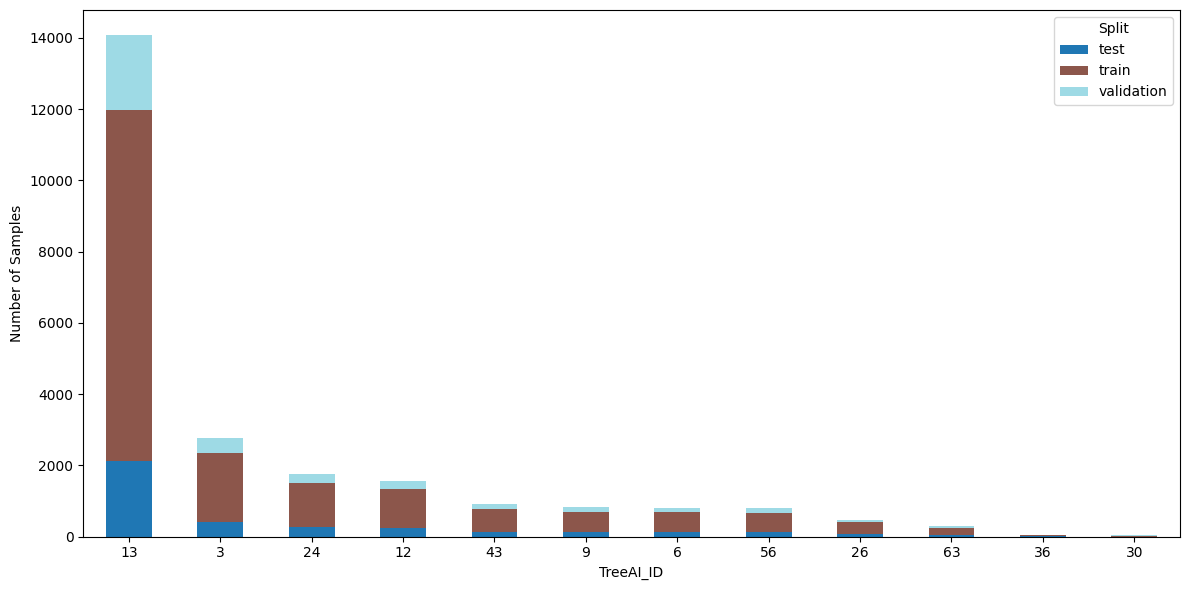

In [16]:
species_split_counts.T.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'
)

plt.xlabel("TreeAI_ID")
plt.ylabel("Number of Samples")
plt.legend(title="Split")
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()